## Handling portraits as a dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                std=[0.5, 0.5, 0.5])
    ])
#0.44033678288579914 0.3763840977856132 0.31458868030198656
#0.28575247165984313 0.26723905403650355 0.2453207499185533
portraits = datasets.ImageFolder('../paintings64/', transform=data_transform)
dataloader = torch.utils.data.DataLoader(portraits, batch_size=100,)

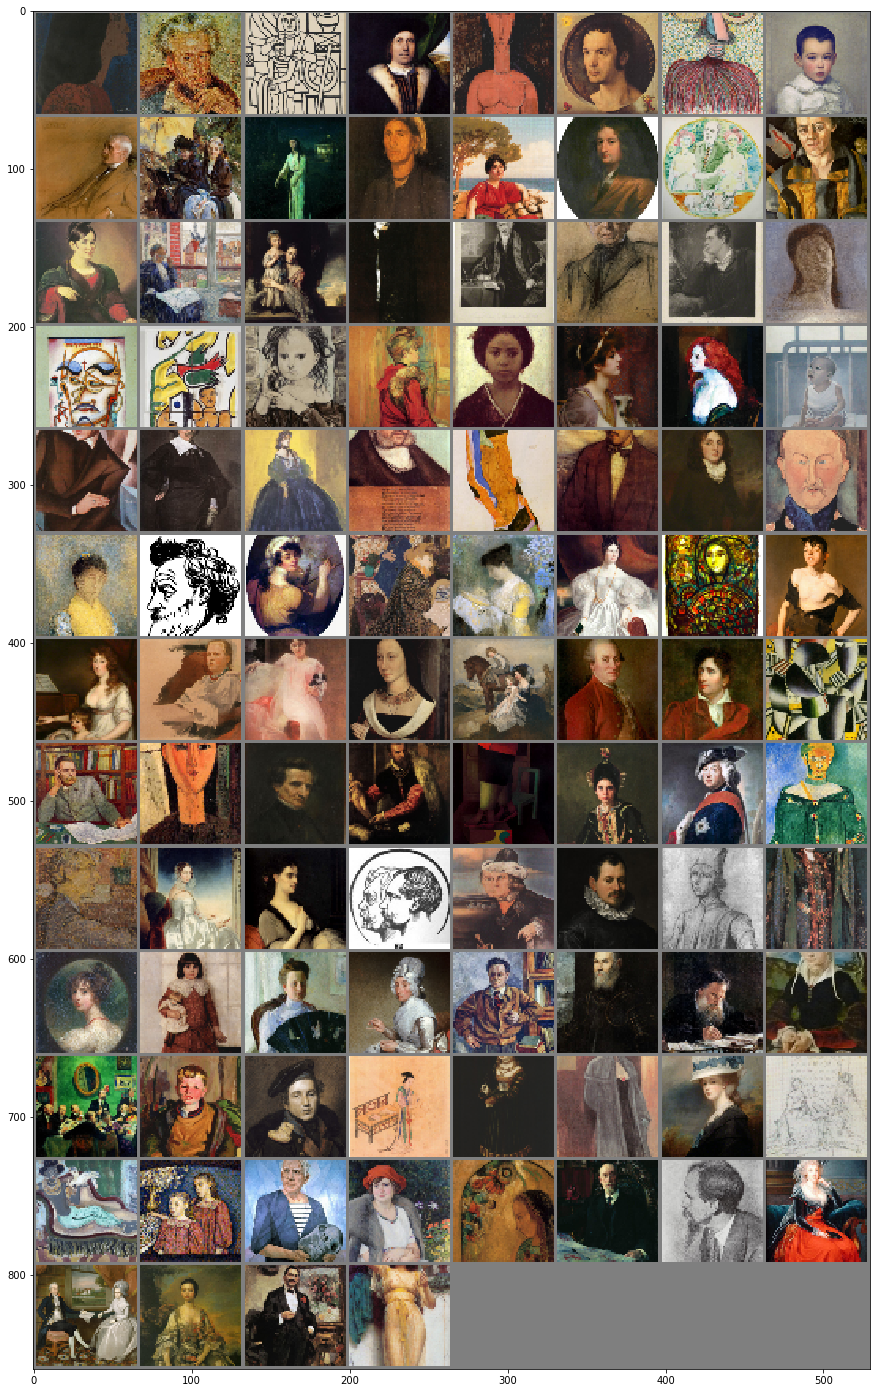

In [4]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

plt.figure(figsize=(15,100))
dataiter = iter(dataloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

In [16]:
(a==1).mean()

0.084716796875

In [23]:
images[:,0,:,:].mean()

0.43954747813286416

In [24]:
images[:,1,:,:].mean()

0.3794185426461956

In [25]:
images[:,2,:,:].mean()

0.3174454542872809

In [28]:
a, b, c = 0, 0, 0
cnt = 0
for img, label in dataloader:
    a += images[:,0,:,:].var()
    b += images[:,1,:,:].var()
    c += images[:,2,:,:].var()
    cnt += 1

## Condition on style

In [5]:
import pandas as pd
data = pd.read_csv('portraits_info.csv')
data.drop(['date', 'genre'], axis=1, inplace=True)
data.dropna(inplace=True)

In [6]:
data.head()

,filename,artist,title,style
1,5194.jpg,accb302082074fa3b73308a2e42f1fd4,Portrait of Giovanni della Volta with his Wife...,High Renaissance
2,840.jpg,e8eae9a2f53456f01d601ae153f76a2d,Boy with a Greyhound,Mannerism (Late Renaissance)
3,95721.jpg,9ee8bdc8cacd9654c2f565c618af10ab,Mary with Biedermeier hut,Symbolism
4,820.jpg,accb302082074fa3b73308a2e42f1fd4,A Lady with a Drawing of Lucretia,High Renaissance
5,40672.jpg,397c63db1c7b507d23abff3f8bb0fa18,Lady with a Lap Dog,Baroque


In [7]:
gbartist = data.groupby('artist').count().drop(['title', 'filename'], axis=1)
gbartist.columns = ['count']
gbartist.sort_values('count', ascending=False, inplace=True)
gbartist

,count
artist,
121fffad1eb6f7dff228b8a71b6aec72,244
e1587900e782de448f604b37cde0fdfd,215
ea2beb11e25ec317263983dbdd6de81e,182
129349585c3d1f312535b6619fc36bf7,177
b31c8ec49c09506f17ec3c0c04fce567,166
c16781c4321948227193214b68477a5c,147
bc58ed3c3e7750f9644953020a39e867,145
fbaf536ad899a31e80be9ff101b119cc,143
50900e56a7480824436d7ad7f83fcc2b,143


In [8]:
l = []
for i in range(1, 100):
    tmp = gbartist[gbartist['count'] >= i]
    l.append(len(data.join(tmp, on='artist', rsuffix='r', how='inner')))

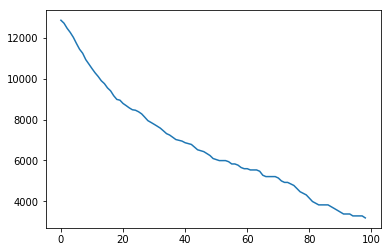

In [9]:
plt.plot(l)

In [10]:
gbstyle = data.groupby('style').count().drop(['title', 'filename'], axis=1)
gbstyle.columns = ['count']
gbstyle.sort_values('count', ascending=False, inplace=True)
gbstyle

,count
style,
Realism,1874
Romanticism,1698
Expressionism,1330
Impressionism,1095
Rococo,1085
Baroque,841
Post-Impressionism,647
Neoclassicism,551
Art Nouveau (Modern),388


In [11]:
l = []
for i in range(1, 200):
    tmp = gbstyle[gbstyle['count'] >= i]
    l.append(len(data.join(tmp, on='style', rsuffix='r', how='inner')))

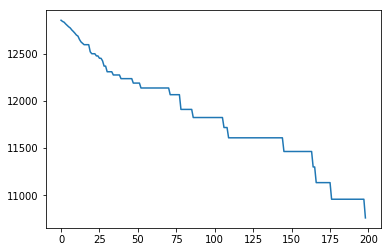

In [12]:
plt.plot(l)

### Reorganising the folder

In [13]:
import os

In [14]:
data.index = data.filename

In [15]:
styles = data['style'].unique()

In [16]:
styles

array(['High Renaissance', 'Mannerism (Late Renaissance)', 'Symbolism',
       'Baroque', 'Realism', 'Art Nouveau (Modern)', 'Neoclassicism',
       'Romanticism', 'Rococo', 'Neo-Rococo', 'Impressionism',
       'Magic Realism', 'Northern Renaissance', 'Early Renaissance',
       'Post-Impressionism', 'Ukiyo-e', 'Expressionism',
       'Naïve Art (Primitivism)', 'Fauvism', 'Japonism', 'Academicism',
       'Biedermeier', 'Tenebrism', 'Cloisonnism', 'Pop Art',
       'American Realism', 'Cubism', 'Surrealism', 'Socialist Realism',
       'Muralism', 'Tubism', 'Orientalism', 'International Gothic',
       'Futurism', 'New Realism', 'Pointillism', 'Cubo-Futurism',
       'Purism', 'Contemporary Realism', 'Regionalism', 'Verism',
       'Neo-baroque', 'Art Deco', 'Kitsch', 'Intimism', 'Tonalism',
       'Hyper-Realism', 'Metaphysical art', 'Sōsaku hanga', 'Dada',
       'Poster Art Realism', 'Divisionism', 'Neo-Expressionism',
       'Social Realism', 'Suprematism', 'Existential Art',
    

In [22]:
common_styles = list(gbstyle.index[gbstyle['count']>=100])
common_styles

['Realism',
 'Romanticism',
 'Expressionism',
 'Impressionism',
 'Rococo',
 'Baroque',
 'Post-Impressionism',
 'Neoclassicism',
 'Art Nouveau (Modern)',
 'Northern Renaissance',
 'Symbolism',
 'Mannerism (Late Renaissance)',
 'Ukiyo-e',
 'Academicism',
 'Surrealism',
 'Cubism',
 'Naïve Art (Primitivism)',
 'High Renaissance',
 'American Realism',
 'Fauvism',
 'Pop Art']

In [32]:
common_styles = [s.lower().replace(' ', '_') for s in common_styles]

In [27]:
path = '../paintings64/portraits/'
files = os.listdir(path)

In [30]:
[f for f in files if f[-4:] != '.jpg']

[]

In [16]:
files

['54266.jpg',
 '61640.jpg',
 '74458.jpg',
 '68661.jpg',
 '78778.jpg',
 '69357.jpg',
 '65141.jpg',
 '23000.jpg',
 '67461.jpg',
 '55510.jpg',
 '41867.jpg',
 '42166.jpg',
 '75730.jpg',
 '82181.jpg',
 '46682.jpg',
 '9346.jpg',
 '96151.jpg',
 '14361.jpg',
 '69923.jpg',
 '11184.jpg',
 '5237.jpg',
 '89517.jpg',
 '1345.jpg',
 '46661.jpg',
 '45631.jpg',
 '74481.jpg',
 '50938.jpg',
 '16267.jpg',
 '6258.jpg',
 '67890.jpg',
 '84873.jpg',
 '23992.jpg',
 '102150.jpg',
 '90778.jpg',
 '80091.jpg',
 '71289.jpg',
 '3017.jpg',
 '7392.jpg',
 '53766.jpg',
 '56046.jpg',
 '4603.jpg',
 '14689.jpg',
 '86373.jpg',
 '45067.jpg',
 '38226.jpg',
 '41667.jpg',
 '36813.jpg',
 '70690.jpg',
 '57682.jpg',
 '94122.jpg',
 '33737.jpg',
 '89680.jpg',
 '89549.jpg',
 '49648.jpg',
 '22507.jpg',
 '72897.jpg',
 '91960.jpg',
 '75936.jpg',
 '43100.jpg',
 '32003.jpg',
 '49086.jpg',
 '88298.jpg',
 '87023.jpg',
 '99323.jpg',
 '32496.jpg',
 '55840.jpg',
 '68325.jpg',
 '36847.jpg',
 '38932.jpg',
 '59042.jpg',
 '9350.jpg',
 '23803.jpg',

In [31]:
os.mkdir('../paintings64/not_used')

In [34]:
for s in common_styles:
    os.mkdir('../paintings64/portraits/' + s)

In [22]:
files

['69357.jpg',
 '5237.jpg',
 '45631.jpg',
 '16267.jpg',
 '33737.jpg',
 '79368.jpg',
 '36699.jpg',
 '12881.jpg',
 '38812.jpg',
 '8372.jpg',
 '65126.jpg',
 '56087.jpg',
 '53797.jpg',
 '47542.jpg',
 '3425.jpg',
 '88363.jpg',
 '37583.jpg',
 '5090.jpg',
 '30963.jpg',
 '49359.jpg',
 '39995.jpg',
 '38249.jpg',
 '79623.jpg',
 '67442.jpg',
 '100823.jpg',
 '66629.jpg',
 '99657.jpg',
 '86300.jpg',
 '5490.jpg',
 'Mannerism (Late Renaissance)',
 '92677.jpg',
 '76636.jpg',
 '77910.jpg',
 '80078.jpg',
 '95191.jpg',
 '21744.jpg',
 '15344.jpg',
 '44448.jpg',
 '19022.jpg',
 '66119.jpg',
 '48107.jpg',
 '74361.jpg',
 '78131.jpg',
 '13688.jpg',
 '6299.jpg',
 '29139.jpg',
 '6142.jpg',
 '56162.jpg',
 '28858.jpg',
 '42097.jpg',
 '27303.jpg',
 '53776.jpg',
 '59367.jpg',
 '21357.jpg',
 '74064.jpg',
 '87791.jpg',
 '22101.jpg',
 '33053.jpg',
 '46818.jpg',
 '99504.jpg',
 '71336.jpg',
 '99288.jpg',
 '39587.jpg',
 '30857.jpg',
 '69326.jpg',
 '21301.jpg',
 '17459.jpg',
 '76238.jpg',
 '94698.jpg',
 '51467.jpg',
 '68784

In [36]:

for f in files:
    if f in data.index:
        s = data['style'].loc[f].lower().replace(' ', '_')
        if s in common_styles:
a            os.rename(path + f, path + s + '/' + f)
        else:
            os.rename(path + f, '../paintings64/not_used/' + f)
    else:
        os.rename(path + f, '../paintings64/not_used/' + f)

In [52]:
for f in os.listdir(path + 'Pop Art'):
    os.rename(path + 'Pop Art/' + f, path + f)

In [53]:
for f in os.listdir('../paintings64/style_too_rare/'):
    os.rename('../paintings64/style_too_rare/' + f, path + f)

In [49]:
list(os.walk(path))

[('../paintings64/portraits/',
  ['Mannerism (Late Renaissance)',
   'Fauvism',
   'Realism',
   'High Renaissance',
   'Romanticism',
   'Surrealism',
   'Northern Renaissance',
   'Post-Impressionism',
   'Naïve Art (Primitivism)',
   'Symbolism',
   'Academicism',
   'Art Nouveau (Modern)',
   'Cubism',
   'Neoclassicism',
   'American Realism',
   'Rococo',
   'Impressionism',
   'Pop Art',
   'Baroque',
   'Ukiyo-e',
   'Expressionism'],
  []),
 ('../paintings64/portraits/Mannerism (Late Renaissance)', [], []),
 ('../paintings64/portraits/Fauvism', [], []),
 ('../paintings64/portraits/Realism', [], []),
 ('../paintings64/portraits/High Renaissance', [], []),
 ('../paintings64/portraits/Romanticism', [], []),
 ('../paintings64/portraits/Surrealism', [], []),
 ('../paintings64/portraits/Northern Renaissance', [], []),
 ('../paintings64/portraits/Post-Impressionism', [], []),
 ('../paintings64/portraits/Naïve Art (Primitivism)', [], []),
 ('../paintings64/portraits/Symbolism', [], []

In [46]:
os.listdir('../paintings64/portraits/')

['Mannerism (Late Renaissance)',
 'Fauvism',
 'Realism',
 'High Renaissance',
 'Romanticism',
 'Surrealism',
 'Northern Renaissance',
 'Post-Impressionism',
 'Naïve Art (Primitivism)',
 'Symbolism',
 'Academicism',
 'Art Nouveau (Modern)',
 'Cubism',
 'Neoclassicism',
 'American Realism',
 'Rococo',
 'Impressionism',
 'Pop Art',
 'Baroque',
 'Ukiyo-e',
 'Expressionism']

## Analysis of loss - cDCGAN portraits 64

In [1]:
import pickle

In [7]:
d = pickle.load(open('results/losses_and_samples_portraits64_conditionalDCGAN.p', 'rb'))

AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx